In [330]:
import matplotlib.pyplot as plt
import pandas as pd 
import json 

In [591]:
with open('../../output/FBAsol_all_reactions_n45_dt01.json', 'r') as file:
    ALLFBAsol45dt01 = json.load(file)

with open('../../output/FBAsol_all_reactions_n50_dt02.json', 'r') as file:
    ALLFBAsol50dt02 = json.load(file)

with open('../../output/EndPointFBA/EBAbm0076_n40_dt01.json', 'r') as file:
    bm076 = json.load(file)


In [388]:
kl = {"dleu": "L", "dlys" : "K"}

def plotFBA(fba, n, dt):
    labels = ["Strain L", "Strain K"]
    for i, mid in enumerate(["dleu", "dlys"]):
        ls = []
        ls.append(-1 * fba[f"BM_{mid}_exchange"])
        for key, value in fba.items():
            if key.startswith(f"BM_{mid}_time"):
                ls.append(value)
        ls.append(fba[f"BM_{mid}_exchange_final"])
        plt.plot(
            [dt* i for i in range(n)],
            ls,
            color=f"C{i}",
            label=labels[i],
        )

    plt.xlabel("Time [h]")
    plt.ylabel("Concentration [gDw]")
    plt.legend()
    plt.show()

In [389]:
def plot_metabolites(fba, dd, n,dt):
    for i, sid in enumerate(dd.keys()):
        ls = []
        ls.append(dd[sid])
        for key, value in fba.items():
            if key.startswith(f"{sid}_time"):
                ls.append(value)
        ls.append(fba[f"{sid}_exchange_final"])
        plt.plot(
            [dt* i for i in range(n)],
            ls,
            color=f"C{i}",
            label=f"[{sid}]",
        )
    plt.xlabel("Time [h]")  
    plt.ylabel("Concentration [mmol]")
    plt.legend()
    plt.show()

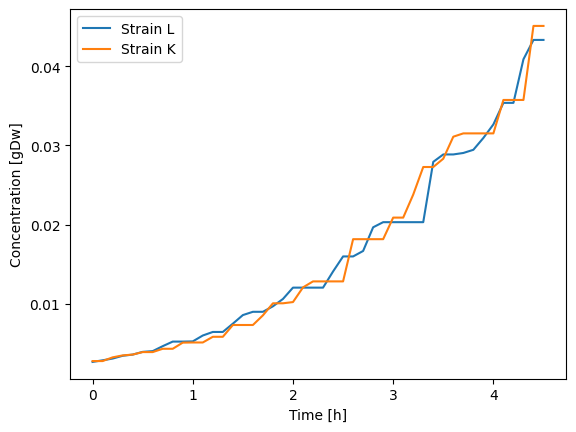

In [597]:
plotFBA(ALLFBAsol45dt01, 46, 0.1)

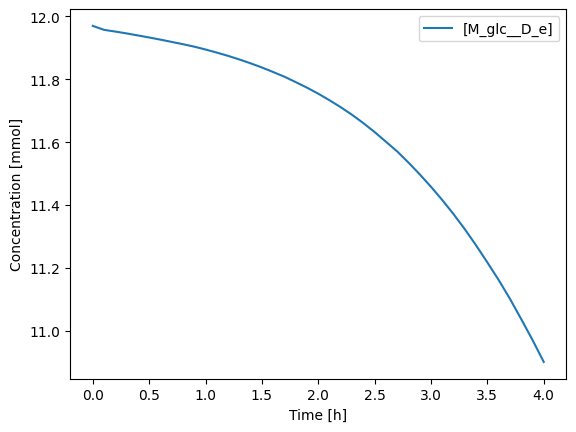

In [595]:
plot_metabolites(ALLFBAsol45dt01,  {"M_glc__D_e": 11.97}, 46, 0.1)



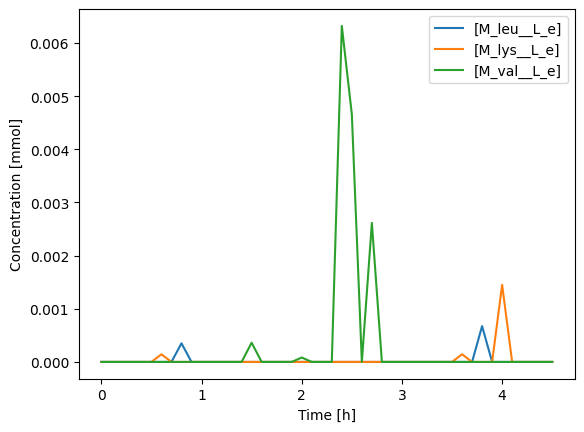

In [598]:
plot_metabolites(ALLFBAsol45dt01,  {"M_leu__L_e": 0, "M_lys__L_e":0, "M_val__L_e": 0}, 46, 0.1)


In [584]:
def plot_fluxes(fba, ids, values, n, dt):
    T = list(map(lambda x: x*dt, list(range(0,n))) )
    times = [f"time{t:0{len(str(n))}d}" for t in range(n)]
   
    i=0
    for id in ids:
        time_ids = [f"{id}_{tid}" for tid in times]
        #Convert back to rate
        ls = [fba[full_id] / (dt * values[i][tel]) for tel, full_id in enumerate(time_ids)]
        plt.plot(T, ls, color=f"C{i}", label=f"[{id[:-5]}] Strain {kl[id[-4:]]}")
        i+=1
    plt.xlabel("Time [h]")
    
    plt.ylabel(r'Flux [$mmol * gDw^{-1} * h^{-1}$]')
    plt.legend()


    plt.show()



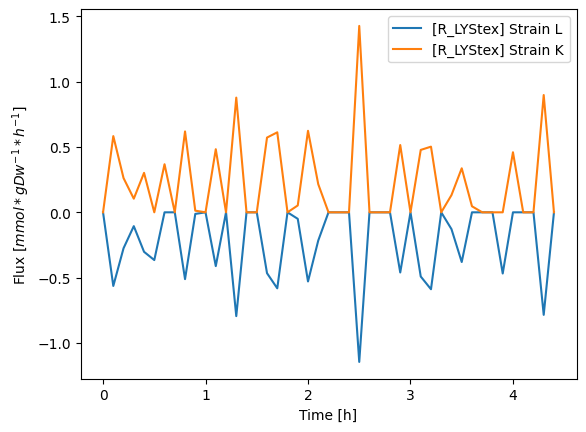

In [568]:
gdws = [[-1*ALLFBAsol45dt01["BM_dleu_exchange"]], [-1*ALLFBAsol45dt01["BM_dlys_exchange"]]]
times = [f"time{t:0{len(str(45))}d}" for t in range(45)]
for i,bid in enumerate(["BM_dleu", "BM_dlys"]):
    time_ids = [f"{bid}_{times[i]}_{times[i+1]}" for i in range(0,44)]
    for tid in time_ids:
        gdws[i].append(ALLFBAsol45dt01[tid])

    

plot_fluxes(ALLFBAsol45dt01, ["R_LYStex_dleu", "R_LYStex_dlys"],gdws , 45, 0.1)

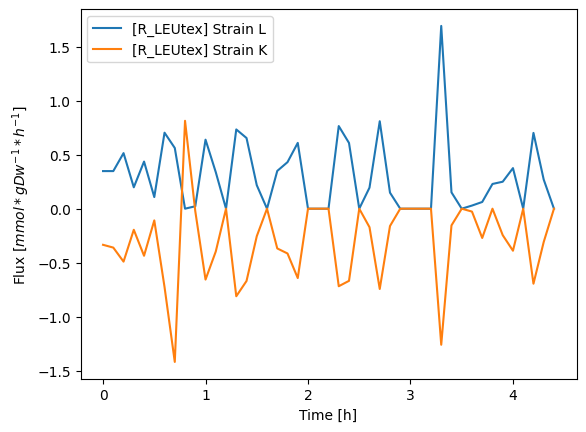

In [569]:
plot_fluxes(ALLFBAsol45dt01, ["R_LEUtex_dleu", "R_LEUtex_dlys"],gdws , 45, 0.1)

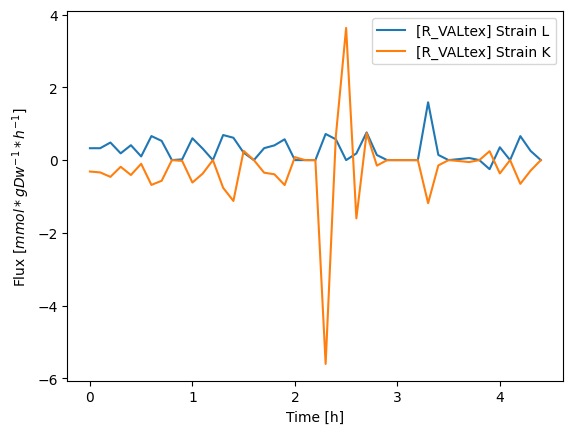

In [571]:
plot_fluxes(ALLFBAsol45dt01, ["R_VALtex_dleu", "R_VALtex_dlys"],gdws , 45, 0.1)



In [533]:
time_ids = [f"R_GLCtex_copy1_dlys_{tid}" for tid in times]
#Convert back to rate
ls = [ALLFBAsol45dt01[full_id] / (0.1 * gdws[1][tel]) for tel, full_id in enumerate(time_ids)]

for v in ls:
    print(v)

10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
9.999999999999998
9.999999999999998
9.999999999999998
9.999999999999998
10.0
10.0
10.0
10.0
9.999999999999998
9.999999999999998
10.0
10.0
9.999999999999998
9.999999999999998
9.999999999999998
9.999999999999998
10.0
10.0
10.0
10.0
10.0
10.0
9.999999999999998
9.999999999999998
9.999999999999998
10.0
10.0
10.0
10.0
10.0
10.0
9.999999999999998
9.999999999999998
9.999999999999998
10.0


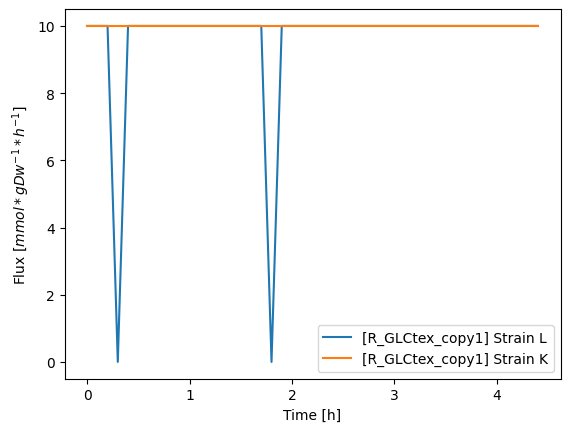

In [529]:
plot_fluxes(ALLFBAsol45dt01, ["R_GLCtex_copy1_dleu", "R_GLCtex_copy1_dlys"], gdws, 45, 0.1)

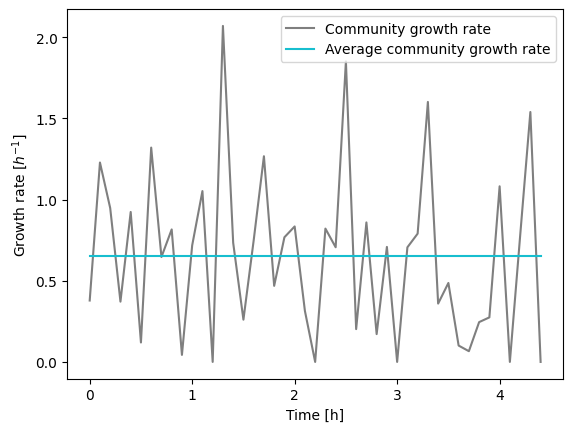

0.6529201300532175


In [530]:
biomass_flux_dleu = [ALLFBAsol45dt01[f"R_BIOMASS_Ec_iAF1260_core_59p81M_dleu_{tid}"] for tid in times]
biomass_flux_dlys = [ALLFBAsol45dt01[f"R_BIOMASS_Ec_iAF1260_core_59p81M_dlys_{tid}"] for tid in times]
xcomm = []
T = list(map(lambda x: x*0.1, list(range(0,45))) )

for i,bm in enumerate(biomass_flux_dleu):
    xcomm.append((bm + biomass_flux_dlys[i]) / (0.1 * (gdws[0][i] + gdws[1][i])) )


plt.plot(T, xcomm, color=f"C{17}", label=f"Community growth rate")
plt.plot(T, [sum(xcomm)/len(xcomm)] * len(xcomm), color=f"C{19}", label=f"Average community growth rate")

plt.xlabel("Time [h]")
plt.ylabel(r'Growth rate [$h^{-1}$]')
plt.legend()


plt.show()

# print(biomasses["dleu"][-1] + biomasses["dlys"][-1])
print(sum(xcomm)/len(xcomm))

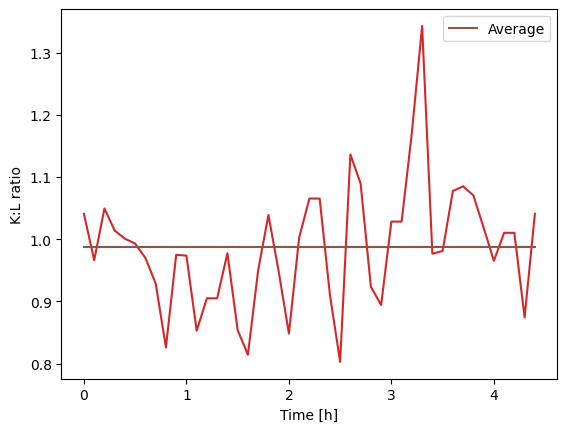

1.0408256172475754
0.9867958012347807


In [532]:
fls = [ v / gdws[0][t] for t,v in enumerate(gdws[1])]
plt.plot(T, fls, color=f"C{3}")
plt.plot(T, [sum(fls)/len(fls)] *(len(T)), color=f"C{5}", label=f"Average")
plt.xlabel("Time [h]")
plt.ylabel("K:L ratio")
plt.legend()


plt.show()

print(fls[-1])


print(sum(fls)/len(fls))

In [495]:
import re

def extract_ids(strings):
    def extract_string(s):
        match = re.match(r'M_.*?_e', s)
        if match:
            return match.group(0)
        else:
            return None

    return [extract_string(s) for s in strings if extract_string(s) is not None]


external_metabolites = extract_ids(list(ALLFBAsol45dt01.keys()))

In [ ]:
external_metabolites = set(external_metabolites)

for sid in external_metabolites:
    ls = []
    ls.append(0)
    for key, value in ALLFBAsol45dt01.items():
        if key.startswith(f"{sid}_time"):
            ls.append(value)
    ls.append(ALLFBAsol45dt01[f"{sid}_exchange_final"])
    if any(value != 0.0 for value in ls):
        plt.plot(
            [0.1* i for i in range(46)],
            ls,
            color=f"blue",
            label=f"[{sid}]",
        )
        plt.xlabel("Time [h]")  
        plt.ylabel("Concentration [mmol]")
        plt.legend()
        plt.show()


<h4><bold>With qp restriction </h4>

In [347]:
with open('../../output/FBAsol_all_reactions_n45_dt01_QP.json', 'r') as file:
    QPsol = json.load(file)

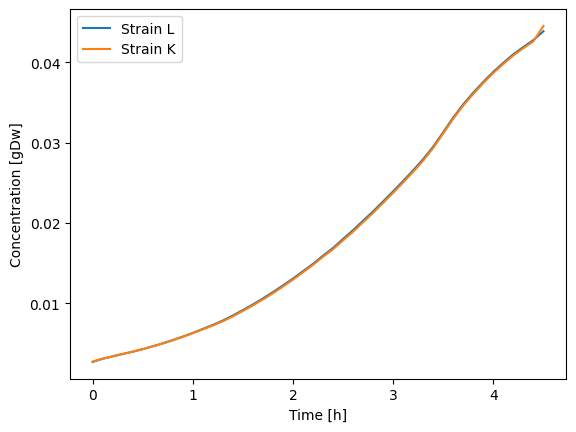

In [397]:
plotFBA(QPsol, 46, 0.1)

In [384]:
times = [f"time{t:0{len(str(45))}d}" for t in range(45)]
ls = [] 
for i in range(1, len(times) -1):
    ls.append(ALLFBAsol45dt01[f"BM_dlys_{times[i-1]}_{times[i]}"] / ALLFBAsol45dt01[f"BM_dleu_{times[i-1]}_{times[i]}"])

print(ls)

print(sum(ls)/ len(ls) )
print(sum(ls)/ len(ls)  - 0.929121152738312)



[0.9662263199921839, 1.049527297963455, 1.0139946252819145, 1.0008917844070693, 0.9929402416268339, 0.9698000376296647, 0.9288770078123084, 0.8259063379840326, 0.9749610915570988, 0.9736748019040236, 0.8528037190216702, 0.9050073805748188, 0.9050073805748188, 0.9775403221278929, 0.8536275393859056, 0.8143245329372011, 0.9501198766574013, 1.0391081681186545, 0.9484518132744729, 0.8483584739678591, 1.0026393544496985, 1.0655409513999137, 1.0655409513999137, 0.9109721443338281, 0.8026199678539622, 1.136444226430032, 1.089400411808029, 0.9235502455666033, 0.8942060079043251, 1.0284218336382982, 1.0284218336382982, 1.1716362802521125, 1.3432820611363945, 0.9766849206950299, 0.9812848454032984, 1.0776649957069235, 1.0852211402664007, 1.0704662567947314, 1.0187266994439004, 0.9652584136052361, 1.0103782100938354, 1.0103782100938354, 0.8742711063560954]
0.984282786536511
0.05516163379819905


In [387]:
print(QPsol["BM_dleu_exchange"])
print(QPsol["BM_dlys_exchange"])


print(QPsol["BM_dleu_exchange_final"])
print(QPsol["BM_dlys_exchange_final"])




-0.0026800162665006956
-0.0027199837334993047
0.04387285888123361
0.0445271411187664


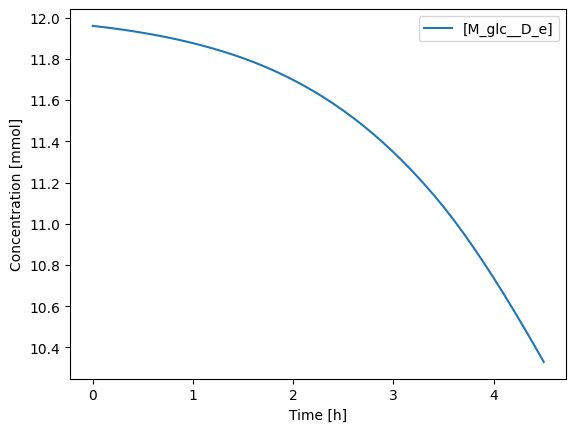

In [349]:
plot_metabolites(QPsol,  {"M_glc__D_e": 11.96, }, 46, 0.1)


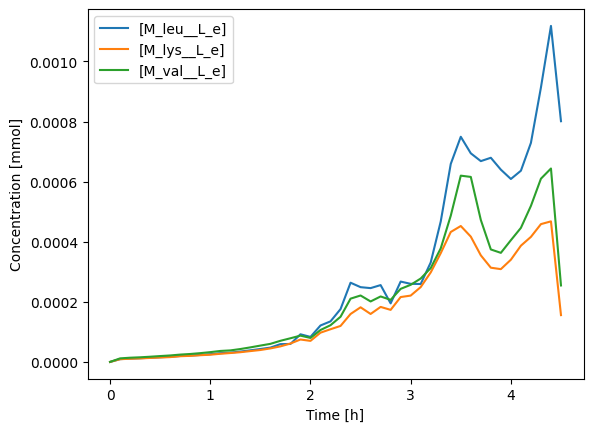

In [350]:
plot_metabolites(QPsol,  {"M_leu__L_e": 0, "M_lys__L_e":0, "M_val__L_e": 0}, 46, 0.1)


In [516]:
gdwsqp = [ [-1*QPsol["BM_dleu_exchange"]], [-1*QPsol["BM_dlys_exchange"]]]
times = [f"time{t:0{len(str(45))}d}" for t in range(45)]

for i,bid in enumerate(["BM_dleu", "BM_dlys"]):
    time_ids = [f"{bid}_{times[i]}_{times[i+1]}" for i in range(44)]
    for tid in time_ids:
        gdwsqp[i].append(QPsol[tid])

In [560]:
# print(-1*QPsol["BM_dleu_exchange"] ) #0.0026800162665006956 -> inital biomass
# print(gdwsqp[1][0])                 
# print(10 * 0.1 * 0.0027199837334993047)
# print(QPsol["R_GLCtex_copy1_dlys_time00"] )
# print((0.00037987918822091494 / 0.1) / 0.0026800162665006956 )
# print( ((QPsol["R_GLCtex_copy1_dlys_time00"] / 0.1) / 0.0027199837334993047))

time_ids = [f"R_GLCtex_copy1_dlys_{tid}" for tid in times]
#Convert back to rate
ls = [QPsol[full_id] / (0.1 * gdwsqp[0][tel]) for tel, full_id in enumerate(time_ids)]

for v in ls:
    print(v)




10.14180901693617
10.00516747483201
9.985682485402588
9.97834041089444
9.97638615488283
9.969950984550264
9.956399088482868
9.956670590795326
9.94321942700712
9.946371836123001
9.938999665512515
9.918464876578598
9.897329080347536
9.870875622415452
9.86980078520675
9.868396420916152
9.875434910109039
9.874119108896117
9.873440564215098
9.8757496249391
9.89509940657487
9.894688045775462
9.904729429645762
9.906154225634879
9.902073281594518
9.892065760110151
9.891788574946158
9.898176988662922
9.90481723192213
9.907788192483583
9.91501221194912
9.918426932148973
9.92184335585302
9.927056686085736
9.934730477304814
9.94220771448151
9.94763607758719
9.946823567775033
9.945767839486242
9.950680924907351
9.951943113781784
9.952548891885112
9.951795825882277
9.95067339730519
9.950026936764068


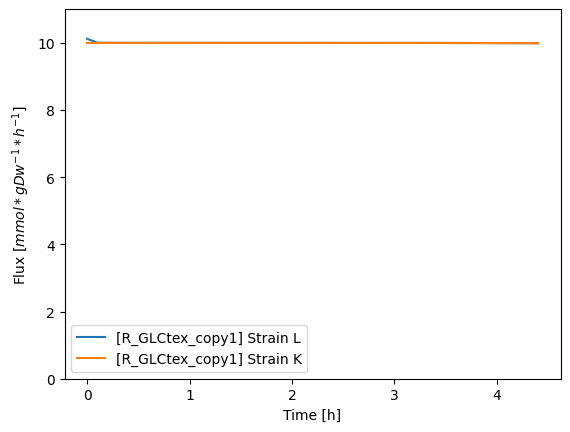

In [576]:
plot_fluxes(QPsol, ["R_GLCtex_copy1_dleu", "R_GLCtex_copy1_dlys"], gdwsqp, 45, 0.1)

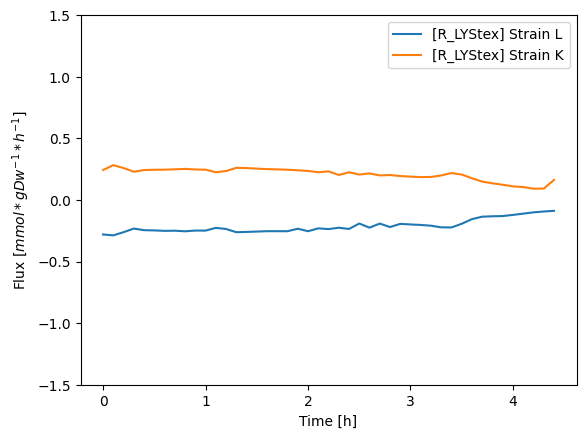

In [573]:
plot_fluxes(QPsol, ["R_LYStex_dleu", "R_LYStex_dlys"],gdwsqp , 45, 0.1)

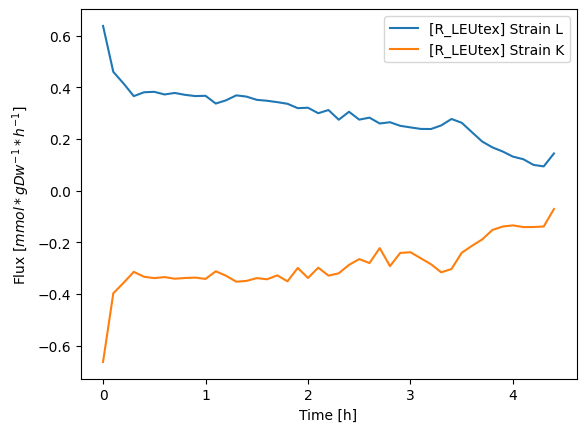

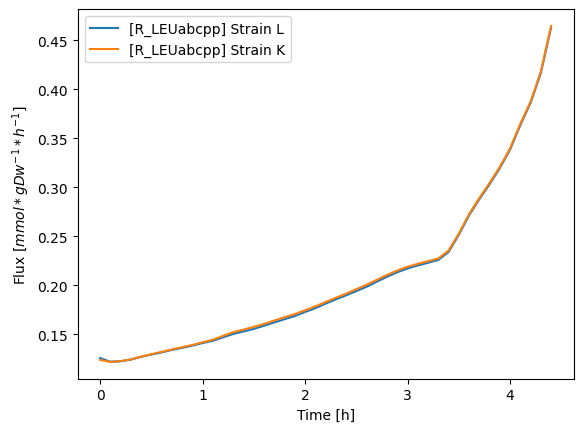

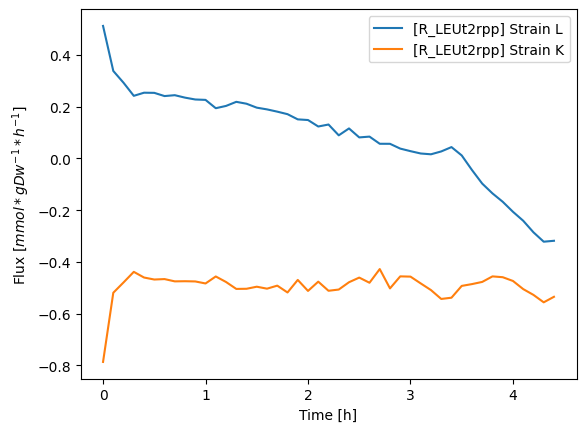

In [590]:
plot_fluxes(QPsol, ["R_LEUtex_dleu", "R_LEUtex_dlys"],gdwsqp , 45, 0.1)

plot_fluxes(QPsol, ["R_LEUabcpp_dleu", "R_LEUabcpp_dlys"],gdwsqp , 45, 0.1)
plot_fluxes(QPsol, ["R_LEUt2rpp_dleu", "R_LEUt2rpp_dlys"],gdwsqp , 45, 0.1)





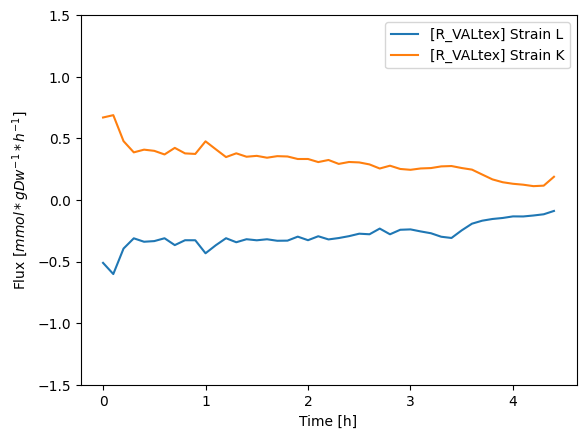

In [562]:

plot_fluxes(QPsol, ["R_VALtex_dleu", "R_VALtex_dlys"],gdwsqp , 45, 0.1)

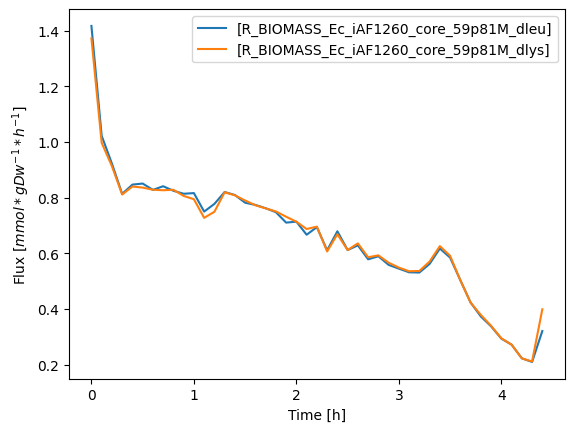

In [366]:
plot_fluxes(QPsol, ["R_BIOMASS_Ec_iAF1260_core_59p81M_dleu", "R_BIOMASS_Ec_iAF1260_core_59p81M_dlys"],gdwsqp , 45, 0.1)

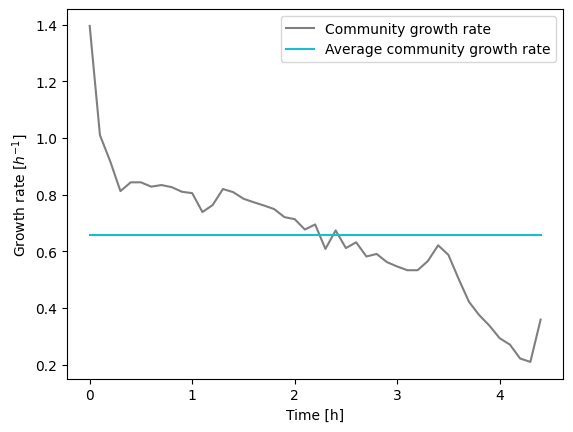

0.6573337704048696


In [410]:
biomass_flux_dleu = [QPsol[f"R_BIOMASS_Ec_iAF1260_core_59p81M_dleu_{tid}"] for tid in times]
biomass_flux_dlys = [QPsol[f"R_BIOMASS_Ec_iAF1260_core_59p81M_dlys_{tid}"] for tid in times]
xcomm = []
T = list(map(lambda x: x*0.1, list(range(0,45))) )

for i,bm in enumerate(biomass_flux_dleu):
    xcomm.append((bm + biomass_flux_dlys[i]) / (0.1 * (gdwsqp[0][i] + gdwsqp[1][i])) )


plt.plot(T, xcomm, color=f"C{17}", label=f"Community growth rate")
plt.plot(T, [sum(xcomm)/len(xcomm)] * len(xcomm), color=f"C{19}", label=f"Average community growth rate")
plt.xlabel("Time [h]")
plt.ylabel(r'Growth rate [$h^{-1}$]')
plt.legend()


plt.show()

# print(biomasses["dleu"][-1] + biomasses["dlys"][-1])
print(sum(xcomm)/len(xcomm))

In [438]:
print(QPsol["X_comm"])
print(QPsol["Phi_dleu"])
print(QPsol["Phi_dlys"])

print(QPsol["Phi_dlys"]/QPsol["Phi_dleu"])

print(gdwsqp)

print(QPsol["BM_dlys_exchange"] / QPsol["BM_dleu_exchange"])
print(QPsol["BM_dlys_exchange"])
print(QPsol["BM_dlys_exchange_final"])

print(QPsol["BM_dlys_exchange_final"] / QPsol["BM_dleu_exchange_final"])
print(T[-1])

0.083
0.49629930861123994
0.5037006913887601
1.0149131434380412
[[0.0026800162665006956, 0.0030743933907451454, 0.0033742322824084703, 0.0036709453612998235, 0.003955135177700135, 0.004275590057016025, 0.0046248251122217796, 0.004993234348243818, 0.005398681997910041, 0.005829415728347002, 0.006289432619825307, 0.006788393622314157, 0.007282960340665555, 0.007834739992529864, 0.008462878456069889, 0.00913347482536107, 0.009832995077444251, 0.010579432441787282, 0.011371044439174404, 0.012206822646446826, 0.013059297036943715, 0.013976910435970845, 0.014894256457882536, 0.015913510528769662, 0.016870865404105314, 0.01800205054209448, 0.019088601652384612, 0.020273776816595437, 0.021431723357650576, 0.022680074482492166, 0.023931764061372277, 0.02522105339019717, 0.0265474208429386, 0.027941961143510104, 0.029497219226129353, 0.031303137116648866, 0.033118273212034546, 0.03477048556592819, 0.03622666587985849, 0.037562354592526014, 0.038814853664986285, 0.039938337385186436, 0.0410083248

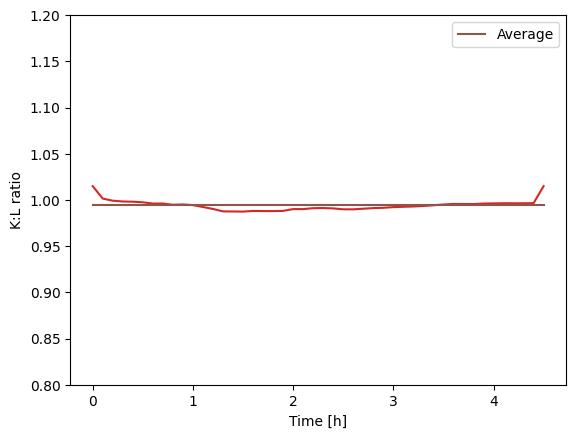

1.0149131434380416
0.9941072434855601


In [445]:
fls = [ v / gdwsqp[0][t] for t,v in enumerate(gdwsqp[1])]
fls.append(QPsol["BM_dlys_exchange_final"] / QPsol["BM_dleu_exchange_final"])
plt.plot(T, fls, color=f"C{3}")
plt.plot(T, [sum(fls)/len(fls)] *(len(T)), color=f"C{5}", label=f"Average")
plt.xlabel("Time [h]")
plt.ylabel("K:L ratio")
plt.legend()
plt.ylim(0.8,1.2)


plt.show()

print(fls[-1])


print(sum(fls)/len(fls))

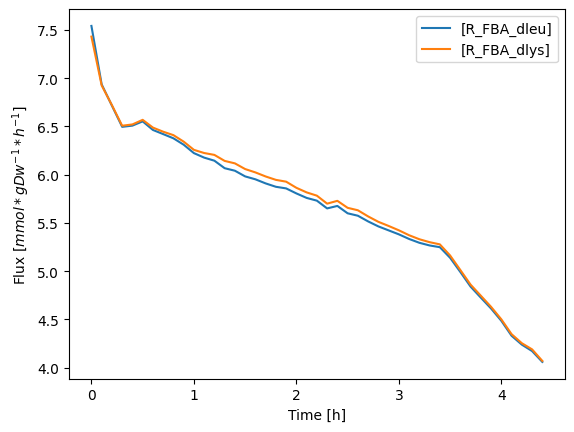

In [386]:
plot_fluxes(QPsol, ["R_FBA_dleu", "R_FBA_dlys"],gdwsqp , 45, 0.1)

In [375]:
times = [f"time{t:0{len(str(45))}d}" for t in range(45)]
average_qp = []
average_nonqp = []
for i, tid in enumerate(times):
    average_qp.append(QPsol[f"R_BIOMASS_Ec_iAF1260_core_59p81M_dleu_{tid}"] / (0.1 * gdwsqp[0][i])+  QPsol[f"R_BIOMASS_Ec_iAF1260_core_59p81M_dlys_{tid}"]/ (0.1*gdwsqp[1][i]))
    average_nonqp.append(ALLFBAsol45dt01[f"R_BIOMASS_Ec_iAF1260_core_59p81M_dleu_{tid}"] / (0.1*gdws[0][i]) +  ALLFBAsol45dt01[f"R_BIOMASS_Ec_iAF1260_core_59p81M_dlys_{tid}"]/ (0.1*gdws[1][i]))


print(sum(average_qp)/ len(average_qp) )
print(sum(average_nonqp)/ len(average_nonqp) )


1.314680854278201
1.2782127614076801


In [577]:
with open('../../output/FBAsol_all_reactions_n45_dt03_subQP.json', 'r') as file:
    subqp03 = json.load(file)

with open('../../output/FBAsol_all_reactions_n45_dt01_subQP.json', 'r') as file:
    subqp01 = json.load(file)


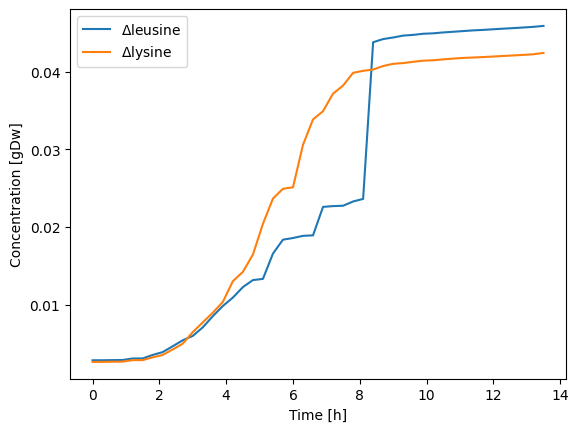

In [291]:
plotFBA(subqp03, 46, 0.3)

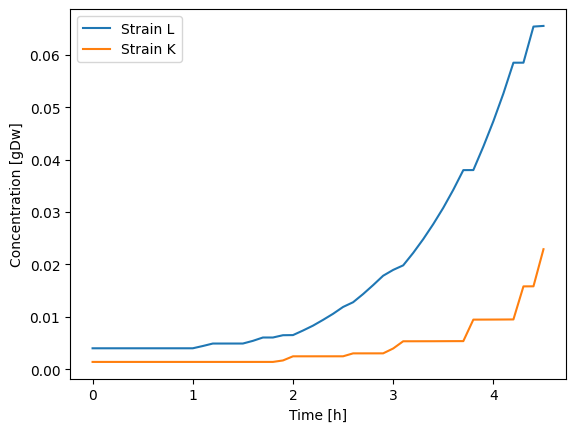

In [578]:
plotFBA(subqp01, 46, 0.1)

In [579]:
gdwsqp03 = [ [-1*subqp03["BM_dleu_exchange"]], [-1*subqp03["BM_dlys_exchange"]]]
# gdwsqp = [[0.0027], [0.0027]]
times = [f"time{t:0{len(str(45))}d}" for t in range(45)]

for i,bid in enumerate(["BM_dleu", "BM_dlys"]):
    time_ids = [f"{bid}_{times[i]}_{times[i+1]}" for i in range(44)]
    for tid in time_ids:
        gdwsqp03[i].append(subqp03[tid])

gdwsqp01 = [ [-1*subqp01["BM_dleu_exchange"]], [-1*subqp01["BM_dlys_exchange"]]]
# gdwsqp = [[0.0027], [0.0027]]
times = [f"time{t:0{len(str(45))}d}" for t in range(45)]

for i,bid in enumerate(["BM_dleu", "BM_dlys"]):
    time_ids = [f"{bid}_{times[i]}_{times[i+1]}" for i in range(44)]
    for tid in time_ids:
        gdwsqp01[i].append(subqp01[tid])

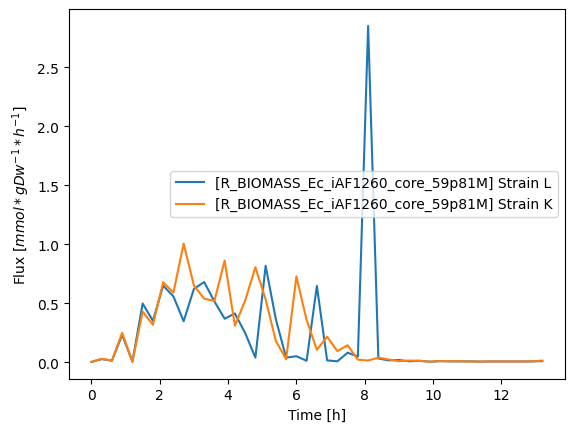

In [586]:
plot_fluxes(subqp03, ["R_BIOMASS_Ec_iAF1260_core_59p81M_dleu", "R_BIOMASS_Ec_iAF1260_core_59p81M_dlys"],gdwsqp03 , 45, 0.3)

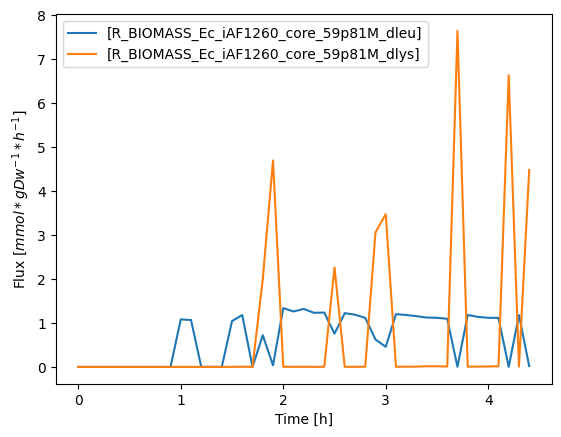

In [329]:
plot_fluxes(subqp01, ["R_BIOMASS_Ec_iAF1260_core_59p81M_dleu", "R_BIOMASS_Ec_iAF1260_core_59p81M_dlys"],gdwsqp01 , 45, 0.1)

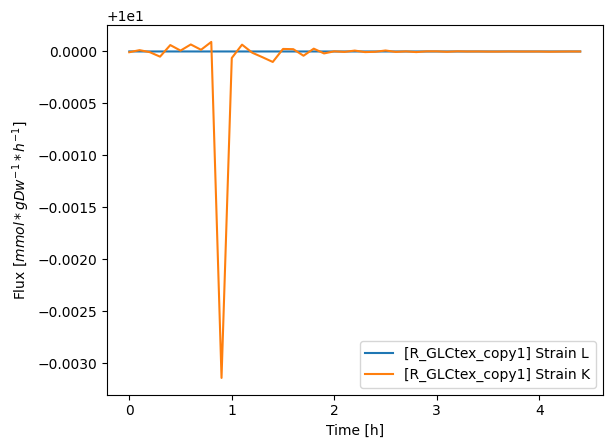

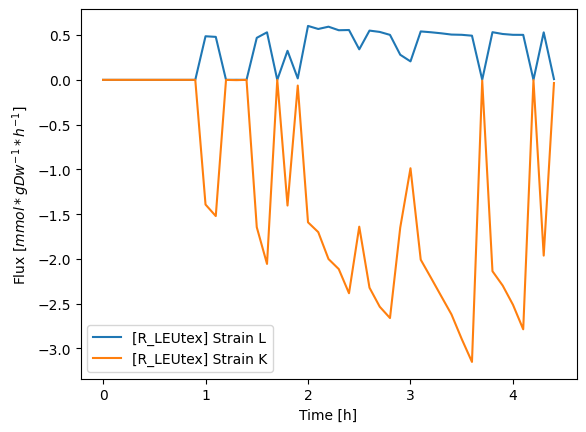

In [585]:
plot_fluxes(subqp01 ,["R_GLCtex_copy1_dleu", "R_GLCtex_copy1_dlys" ], gdwsqp01, 45, 0.1)
plot_fluxes(subqp01 ,["R_LEUtex_dleu", "R_LEUtex_dlys" ], gdwsqp01, 45, 0.1)

In [415]:
with open('../../output/FBAsol_all_reactions_n20_dt02.json', 'r') as file:
    t40 = json.load(file)

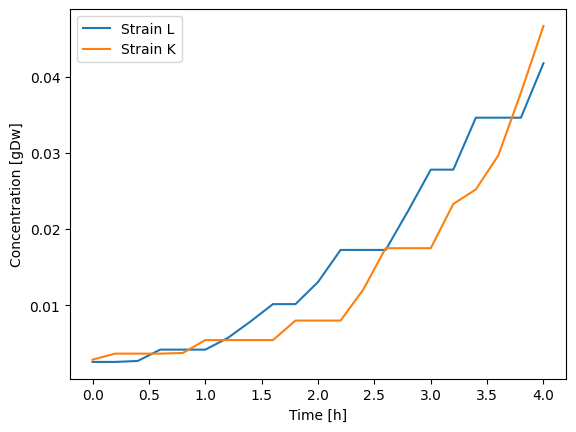

In [419]:
plotFBA(t40, 21, 0.2)